In [1]:
import sys
import numpy as np              # <-- Añadimos 'as np'
import pandas as pd             # <-- Añadimos 'as pd'
import matplotlib
import seaborn as sns           # <-- Añadimos 'as sns'
import sklearn
from IPython.display import display # Pertenece al motor de Jupyter ( IPython) para realizar los prints adaptados a la interfaz de Jupyter, es decir es un print enriquecido . 

print("--- Versiones del Entorno ---")
# Actualizamos también los print para usar los alias
print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Scikit-learn:", sklearn.__version__)

--- Versiones del Entorno ---
Python: 3.11.14 (main, Oct 21 2025, 18:31:21) [GCC 11.2.0]
NumPy: 2.3.4
Pandas: 2.3.3
Matplotlib: 3.10.6
Seaborn: 0.13.2
Scikit-learn: 1.7.2


In [2]:
# Upload dataset of titanic (sns es seaborn)
titanic = sns.load_dataset('titanic')

# print the first five rows
print("Primeras filas del dataset:")
display(titanic.head())

# general info and nuul values 
print("\nInformación general y valores nulos:")
titanic.info()

Primeras filas del dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Información general y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
print("Estadísticas descriptivas:") #Here we make the descriptive statics .
display(titanic.describe())
#We can see on 'age' data , we have missing data , probably Nan stats . We need to do somthing with it .

Estadísticas descriptivas:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#After we see the missing data on 'age' colum , we need to solve it  . And we decide to put the median in place of the NaN cells . 
# 1. Calcular la mediana
mediana_edad = titanic['age'].median()

# 2. Rellenar los nulos y ASIGNAR de vuelta a la columna
# (Esta es la forma 100% segura)
titanic['age'] = titanic['age'].fillna(mediana_edad)

# 3. ¡Verificación! Volvemos a comprobar los nulos
print("\nInformación después de rellenar los nulos:")
titanic.info()


Información después de rellenar los nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
#Now we must dicide , wich graphic is better on this case , for study de case . It is not the same as Iris project , because Iris was similiar , because all the study base was about 'petals' and 'sepals' the pairplot was great because we had all the same style of numbers , 'continue numbers' . So in this case we need to find another method .

In [6]:
#On this titanic case , we have multiply variable style , continuos like 'age' and 'fare' . Discrete numerical like 'sisbp' and 'parch' , and categorical like 'pclass or 'survived'

Distribución de Edad por Supervivencia:


<Axes: xlabel='age', ylabel='Count'>

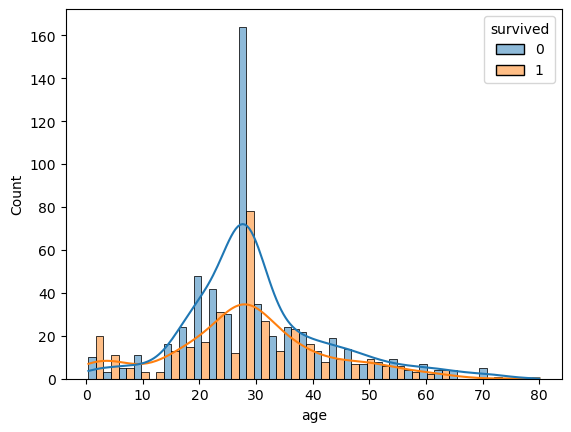

In [7]:
# Histograma para 'age' (edad)
print("Distribución de Edad por Supervivencia:")
sns.histplot(data=titanic, x='age', hue='survived', multiple='dodge', kde=True)
#We can play with multiple = 'stack' and multiple='dodge' for see both sides.
#In all the grapichs below , 0 (blue) is dead's , and 1(orange) means survival (hue='survived' is the refer for this legend) .

Distribución de Tarifa por Supervivencia:


<Axes: xlabel='fare', ylabel='Count'>

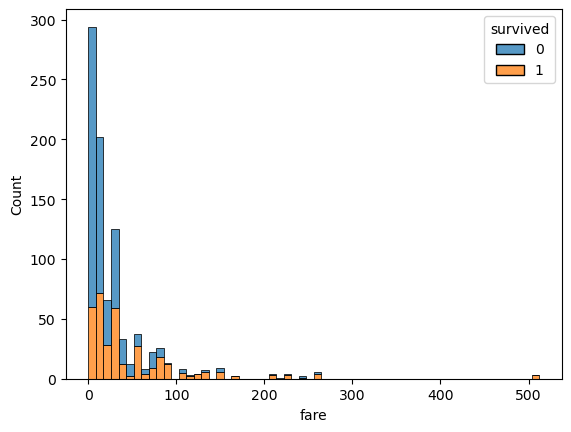

In [8]:
# Histograma para 'fare' (tarifa)
print("Distribución de Tarifa por Supervivencia:")
sns.histplot(data=titanic, x='fare', hue='survived', multiple='stack')

In [9]:
#We can ask here , did survived who paid the highest fare ? :O  , Did survived more kids ? 

Supervivencia por Clase de Pasajero:


<Axes: xlabel='pclass', ylabel='count'>

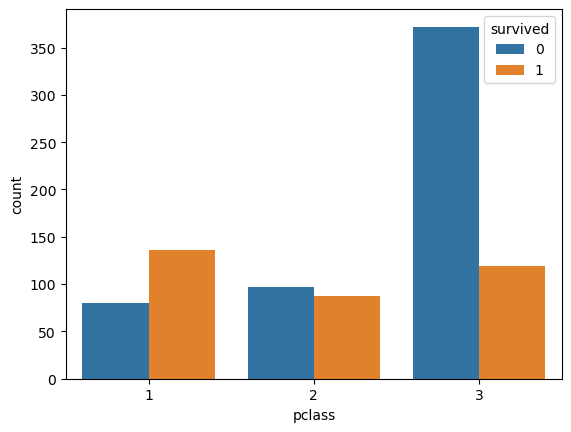

In [10]:
# Conteo para 'pclass' (clase)
print("Supervivencia por Clase de Pasajero:")
sns.countplot(data=titanic, x='pclass', hue='survived')

In [11]:
#We can see clearly about more people from de 3trd class , had more deads than the second and first one .

Relación Edad vs. Tarifa (coloreado por Supervivencia):


<Axes: xlabel='age', ylabel='fare'>

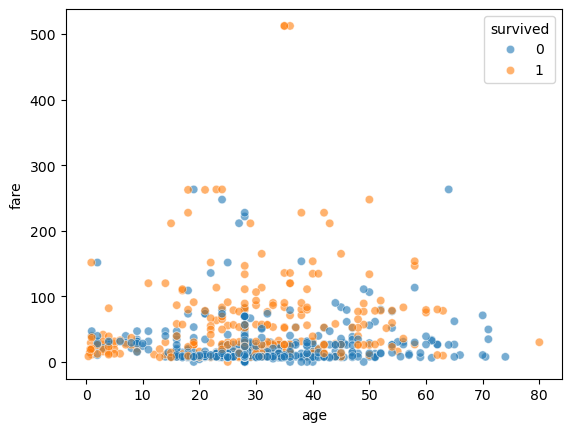

In [12]:
# Dispersión de Edad vs. Tarifa
print("Relación Edad vs. Tarifa (coloreado por Supervivencia):")
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived', alpha=0.6)

In [13]:
#Yesterday with the Iris project , we deleted the colum 'species' because It was the names with letters of the plants . So in this case , we do not need to delete nothing because we have all numerical stuff.


Matriz de correlación:


<Axes: >

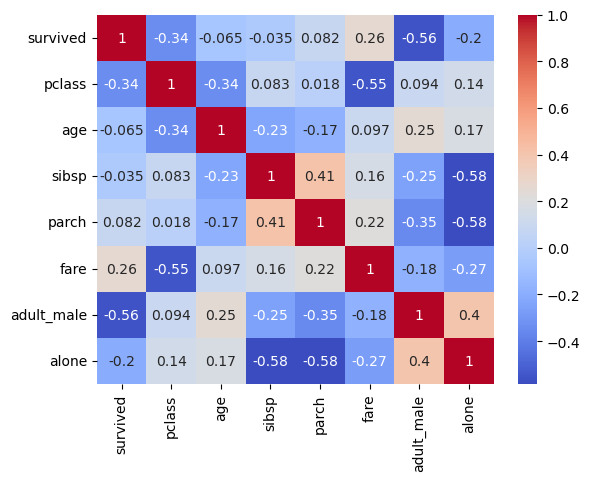

In [14]:
# 1. Calcula la correlación (¡SOLO de las columnas numéricas!)
#    El 'numeric_only=True' soluciona el error con la columna 'Sex'.
correlation_matrix = titanic.corr(numeric_only=True)

# 2. Dibuja el mapa de calor (heatmap)
print("\nMatriz de correlación:")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [15]:
# Before the test , we need to convert all the colums wich we want to use in numbers. 


In [16]:
# --- CÓDIGO CORREGIDO ---

# 1. Convertir 'Sex' a números (0 para 'male', 1 para 'female')
#    Usamos .map() que es muy claro:
#                           ↓ aquí está el cambio
titanic['sex_numeric'] = titanic['sex'].map({'male': 0, 'female': 1})

# 2. Seleccionar SOLO las columnas que usará el modelo
# (Fíjate cómo hemos quitado Name, Sex, Ticket, Cabin, Embarked)
columnas_utiles = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_numeric']

# 3. Crear el DataFrame limpio
titanic_clean = titanic[columnas_utiles]

print("DataFrame limpio listo para el modelo:")
display(titanic_clean.head())

# 4. Verificamos que todo esté bien (¡no nulos, todo números!)
titanic_clean.info()

DataFrame limpio listo para el modelo:


,survived,pclass,age,sibsp,parch,fare,sex_numeric
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   age          891 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   sex_numeric  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [17]:
# 1. Definir X e y (¡usando el dataframe limpio!)
X = titanic_clean.drop(columns='survived')
y = titanic_clean['survived']

# 2. Dividir en entrenamiento y prueba (¡Este código es igual!)
# (Importamos de nuevo por si acaso)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño de prueba: {X_test.shape[0]} muestras")

Tamaño de entrenamiento: 712 muestras
Tamaño de prueba: 179 muestras


In [18]:
# --- 5. ENTRENAMIENTO Y EVALUACIÓN (CORREGIDO) ---

# 5.1. Importar el modelo y la métrica
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 5.2. Crear y Entrenar el Modelo
modelo = DecisionTreeClassifier(random_state=42)
#                   ↓   ↓  Aquí están las correcciones
modelo.fit(X_train, y_train)

print("¡Modelo entrenado!")

# 5.3. Hacer Predicciones con el set de prueba
#                   ↓ Aquí también
y_pred = modelo.predict(X_test)

# 5.4. Evaluar el Rendimiento
#                   ↓ Y aquí
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo (Accuracy): {precision * 100:.2f}%")

¡Modelo entrenado!
Precisión del modelo (Accuracy): 75.42%
